<h1>Sustavi linearnih jednadžbi i nejednadžbi</h1>
<p><i>verzija: SageMath 9.4</i></p>

In [1]:
%display latex

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>1. zadatak</h3>
<p>Riješite sustav</p>
$$\begin{align*}2x+3y+z&=2\\ x-3y+2z&=6\\ -2x+6y-z&=3\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p><strong>1. način</strong> - pomoću naredbe <span style="color: #ff0000;"><em>solve</em></span></p>

In [2]:
x,y,z = var('x y z')
solve([2*x+3*y+z==2,x-3*y+2*z==6,-2*x+6*y-z==3],x,y,z)

[[x == (-7/3), y == (5/9), z == 5]]

<p>ako želimo rješenje dobiti u obliku rječnika</p>

In [3]:
solve([2*x+3*y+z==2,x-3*y+2*z==6,-2*x+6*y-z==3],x,y,z,solution_dict=True)

[{x: -7/3, y: 5/9, z: 5}]

<p><strong>2. način</strong> - pomoću matričnog zapisa</p>

In [4]:
A=matrix(3,3,[2,3,1,1,-3,2,-2,6,-1])
B=matrix(3,1,[2,6,3])
A.solve_right(B)

[-7/3]
[ 5/9]
[   5]

<p><strong>3. način</strong> - možemo definirati svoju funkciju koja će rješavati linearni sustav koji je zadan u matričnom obliku (ova naša funkcija će biti korisna kod sustava koji nemaju jedinstveno rješenje).</p>
<ul>
<li><span style="color: #ff0000;"><em>lijevo</em></span> - predstavlja matricu sustava</li>
<li><span style="color: #ff0000;"><em>desno</em></span> - predstavlja matricu slobodnih koeficijenata</li>
<li><span style="color: #ff0000;"><em>varijable</em></span> - lista nepoznanica</li>
<li><span style="color: #ff0000;"><em>parametri</em></span> - lista u kojoj je dan raspored nepoznanica onim redoslijedom kojim želimo po potrebi uzimati pojedine varijable za parametre. Ako ništa ne navedemo, tada se nepoznanice uzimaju za parametre onim redoslijedom kojim su dane u listi <span style="color: #ff0000;"><em>varijable</em></span>. Nepoznanice se za parametre uzimaju počevši od kraja liste <span style="color: #ff0000;"><em>parametri</em></span>.</span><em><br /></em></span></li>
<li><span style="color: #ff0000;"><em>rjecnik </em></span> - želimo li rješenje sustava dobiti u obliku rječnika<br /></li>
</ul>

In [5]:
def linear_solve(lijevo,desno,varijable,parametri=None,rjecnik=False):
    jednadzbe=[]
    if parametri==None: parametri=varijable
    lijeva_strana=lijevo*matrix([[t] for t in varijable])
    for i in range(lijeva_strana.nrows()):
        for j in range(lijeva_strana.ncols()):
            jednadzbe.append(lijeva_strana[i,j]==desno[i,j])
    rj=solve(jednadzbe,*parametri,solution_dict=rjecnik)
    return rj

In [6]:
linear_solve(A,B,[x,y,z])

[[x == (-7/3), y == (5/9), z == 5]]

In [7]:
linear_solve(A,B,[x,y,z],rjecnik=True)

[{x: -7/3, y: 5/9, z: 5}]

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>2. zadatak</h3>
<p>Zadan je sustav jednadžbi</p>
$$\begin{align*}x+y+2z+3u&=6\\ x-4y+2z-3u&=-4\\ 7y+2z+5u&=12\\ x+3y+4z+2u&=8\end{align*}.$$
<p>Odredite opće rješenje sustava, odredite uvjet pod kojim je suma komponenata rješenja pozitivna i nađite sva bazična rješenja.</p>
</div>
<h3>Rješenje</h3>

<p>uočite da iako sustav ima beskonačno mnogo rješenje, <span style="color: #ff0000;"><em>solve_right</em></span> metoda daje samo jedno specijalno rješenje, a naša funkcija <span style="color: #ff0000;"><em>linear_solve</em></span> će dati sva rješenja</p>

In [8]:
x,y,z,u=var('x y z u')
solve([x+y+2*z+3*u==6,x-4*y+2*z-3*u==-4,7*y+2*z+5*u==12,x+3*y+4*z+2*u==8],[x,y,z,u])

[[x == -26/5*r1 + 6, y == -6/5*r1 + 2, z == 17/10*r1 - 1, u == r1]]

In [9]:
A=matrix(4,4,[1,1,2,3,1,-4,2,-3,0,7,2,5,1,3,4,2])
B=matrix(4,1,[6,-4,12,8])
A.solve_right(B)

[ 6]
[ 2]
[-1]
[ 0]

In [10]:
linear_solve(A,B,[x,y,z,u])

[[x == -26/5*r2 + 6, y == -6/5*r2 + 2, z == 17/10*r2 - 1, u == r2]]

<p><strong>opće rješenje sustava u kojemu je varijabla $x$ parametar</strong></p>

In [11]:
solve([x+y+2*z+3*u==6,x-4*y+2*z-3*u==-4,7*y+2*z+5*u==12,x+3*y+4*z+2*u==8],[y,z,u,x])

[[y == 3/13*r3 + 8/13, z == -17/52*r3 + 25/26, u == -5/26*r3 + 15/13, x == r3]]

In [12]:
linear_solve(A,B,[x,y,z,u],[y,z,u,x])

[[y == 3/13*r4 + 8/13, z == -17/52*r4 + 25/26, u == -5/26*r4 + 15/13, x == r4]]

<p><strong>opće rješenje sustava u kojemu je varijabla $y$ parametar</strong></p>

In [13]:
solve([x+y+2*z+3*u==6,x-4*y+2*z-3*u==-4,7*y+2*z+5*u==12,x+3*y+4*z+2*u==8],[x,z,u,y])

[[x == 13/3*r5 - 8/3, z == -17/12*r5 + 11/6, u == -5/6*r5 + 5/3, y == r5]]

In [14]:
linear_solve(A,B,[x,y,z,u],[x,z,u,y])

[[x == 13/3*r6 - 8/3, z == -17/12*r6 + 11/6, u == -5/6*r6 + 5/3, y == r6]]

<p><strong>opće rješenje sustava u kojemu je varijabla $z$ parametar</strong></p>

In [15]:
solve([x+y+2*z+3*u==6,x-4*y+2*z-3*u==-4,7*y+2*z+5*u==12,x+3*y+4*z+2*u==8],[x,y,u,z])

[[x == -52/17*r7 + 50/17, y == -12/17*r7 + 22/17, u == 10/17*r7 + 10/17, z == r7]]

In [16]:
linear_solve(A,B,[x,y,z,u],[x,y,u,z])

[[x == -52/17*r8 + 50/17, y == -12/17*r8 + 22/17, u == 10/17*r8 + 10/17, z == r8]]

<p><strong>opće rješenje sustava u kojemu je varijabla $u$ parametar</strong></p>

In [17]:
solve([x+y+2*z+3*u==6,x-4*y+2*z-3*u==-4,7*y+2*z+5*u==12,x+3*y+4*z+2*u==8],[x,y,z,u])

[[x == -26/5*r9 + 6, y == -6/5*r9 + 2, z == 17/10*r9 - 1, u == r9]]

In [18]:
linear_solve(A,B,[x,y,z,u])

[[x == -26/5*r10 + 6, y == -6/5*r10 + 2, z == 17/10*r10 - 1, u == r10]]

<p><strong>uvjet da je suma komponenata rješenja pozitivna</strong> - pogledat ćemo taj uvjet na općem rješenju u kojemu je varijabla $y$ parametar (analogno bismo mogli pogledati i za ostale oblike općih rješenja)</p>

In [19]:
rjesenje=linear_solve(A,B,[x,y,z,u],[x,z,u,y],rjecnik=True);rjesenje

[{x: 13/3*r11 - 8/3, z: -17/12*r11 + 11/6, u: -5/6*r11 + 5/3, y: r11}]

In [20]:
uvjet=rjesenje[0][x]+rjesenje[0][y]+rjesenje[0][z]+rjesenje[0][u];uvjet

37/12*r11 + 5/6

In [21]:
solve(uvjet>0,rjesenje[0][y])

[[r11 > (-10/37)]]

<h3>bazična rješenja</h3>

<p>Ne postoji gotova naredba u SAGE-u koja bi ispisala sva bazična rješenja zadanog sustava. Stoga ćemo definirati svoju funkciju <span style="color: #ff0000;"><em>bazicna_rjesenja</em></span>. Ta funkcija na ulazu traži sljedeće podatke:</p>
<ul>
<li><span style="color: #ff0000;"><em>matrica</em></span> - matrica sustava koja može biti unešena i kao dvodimenzionalna python lista (nije potrebno pisati ključnu riječ <em><span style="color: #ff0000;">matrix</span></em>, ali neće biti greška ako se i napiše)</li>
<li><span style="color: #ff0000;"><em>koeficijenti</em></span> - matrica slobodnih koeficijenata koja također može biti unešena i kao jednodimenzionalna python lista</li>
<li><span style="color: #ff0000;"><em>nepoznanice</em></span> - matrica nepoznanica koja se unosi kao jednodimenzionalna python lista</li>
</ul>
<p>Ukoliko je sustav kontradiktoran ili ima jedinstveno rješenje, funkcija <span style="color: #ff0000;"><em>bazicna_rjesenja</em></span> će vas o tome obavijestiti.</p>

In [22]:
def bazicna_rjesenja(matrica,koeficijenti,nepoznanice):
    if type(matrica)==list: matrica=matrix(matrica)
    if type(koeficijenti)!=list: koeficijenti=koeficijenti.list()
    if matrix(matrica.columns()+[tuple(koeficijenti)]).rank()!=matrica.rank():
        return "Error: sustav je kontradiktoran"
    brojParametara=len(nepoznanice)-matrica.rank()
    if brojParametara==0:
        return "Error: sustav ima jedinstveno rjesenje"
    X=matrix(len(nepoznanice),1,nepoznanice)
    lijevo=matrica*X
    desno=matrix(len(koeficijenti),1,koeficijenti)
    jednadzbe=[]
    for i in range(lijevo.nrows()): 
         for j in range(lijevo.ncols()): 
             jednadzbe.append(lijevo[i,j]==desno[i,j])
    parametri=Combinations(zip(nepoznanice,[0]*len(nepoznanice)),brojParametara)
    for t in parametri:
        var1=list(map(lambda q: q[0], t))
        var2=list(filter(lambda q: not(q in var1), nepoznanice))
        rjesenje=solve(list(map(lambda q: q.substitute(dict(t)), jednadzbe)),*var2)
        if rjesenje!=[]:
            rjesenje=list(map(lambda q: q[0]==q[1],t))+rjesenje[0]
            print(rjesenje)
    return None

In [23]:
bazicna_rjesenja(A,B,[x,y,z,u])

[x == 0, y == (8/13), z == (25/26), u == (15/13)]
[y == 0, x == (-8/3), z == (11/6), u == (5/3)]
[z == 0, x == (50/17), y == (22/17), u == (10/17)]
[u == 0, x == 6, y == 2, z == -1]


<p><strong>Prvi zadatak i bazična rješenja</strong> - sustav u prvom zadatku ima jedinstveno rješenje, što naša funkcija <span style="color: #ff0000;"><em>bazicna_rjesenja</em></span> to i prepoznaje</p>

In [24]:
bazicna_rjesenja([[2,3,1],[1,-3,2],[-2,6,-1]],[2,6,3],[x,y,z])

'Error: sustav ima jedinstveno rjesenje'

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>3. zadatak</h3>
<p>Zadan je sustav jednadžbi</p>
$$\begin{align*}2x_1+3x_2+2x_3+6x_4&=1\\ -2x_1+3x_2-6x_3+12x_4&=-19\\ 2x_1+6x_2+15x_4&=-8\end{align*}.$$
<p>Odredite opće rješenje sustava tako da varijable $x_3$ i $x_4$ budu parametri i nađite sva bazična rješenja.</p>
</div>
<h3>Rješenje</h3>

In [25]:
x1,x2,x3,x4=var('x1 x2 x3 x4')

In [26]:
A=matrix(3,4,[2,3,2,6,-2,3,-6,12,2,6,0,15])
B=matrix(3,1,[1,-19,-8])

In [27]:
linear_solve(A,B,[x1,x2,x3,x4],[x1,x2,x4,x3])

[[x1 == -2*r12 + 3/2*r13 + 5, x2 == 2/3*r12 - 3*r13 - 3, x4 == r13, x3 == r12]]

<p>ako želimo da varijable $x_1$ i $x_3$ budu parametri</p>

In [28]:
linear_solve(A,B,[x1,x2,x3,x4],[x2,x4,x3,x1])

[[x2 == -2*r14 - 10/3*r15 + 7, x4 == 2/3*r14 + 4/3*r15 - 10/3, x3 == r15, x1 == r14]]

<p><strong>bazična rješenja</strong></p>

In [29]:
bazicna_rjesenja(A,B,[x1,x2,x3,x4])

[x1 == 0, x2 == 0, x3 == (21/10), x4 == (-8/15)]
[x1 == 0, x3 == 0, x2 == 7, x4 == (-10/3)]
[x1 == 0, x4 == 0, x2 == (-4/3), x3 == (5/2)]
[x2 == 0, x3 == 0, x1 == (7/2), x4 == -1]
[x2 == 0, x4 == 0, x1 == -4, x3 == (9/2)]
[x3 == 0, x4 == 0, x1 == 5, x2 == -3]


<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>4. zadatak</h3>
<p>Riješite sustav jednadžbi</p>
$$\begin{align*}x_1-4x_2+5x_3&=6\\ -3x_2+2x_3&=-12\\ 2x_1+7x_2&=35\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>Sustav je kontradiktoran.</p>

In [30]:
A=matrix(3,3,[1,-4,5,0,-3,2,2,7,0])
B=matrix(3,1,[6,-12,35])

In [31]:
linear_solve(A,B,[x1,x2,x3])

[]

<p>Naša implementirana funkcija <span style="color: #ff0000;"><em>bazicna_rjesenja</em></span> će nas također obavijestiti da se radi o kontradiktornom sustavu pa nema smisla tražiti bazična rješenja.</p>

In [32]:
bazicna_rjesenja(A,B,[x1,x2,x3])

'Error: sustav je kontradiktoran'

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px;">
<h3>5. zadatak</h3>
<p>Odredite sva bazična rješenja sustava</p>
$$\begin{align*}-4x_1-3x_2-4x_3&=-1\\ x_1+x_2+x_3&=1\\ 14x_1+11x_2+14x_3&=5\\ 11x_1+9x_2+11x_3&=5\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>Pogledajmo najprije kako izgleda opće rješenje zadanog sustava.</p>

In [33]:
A=matrix(4,3,[-4,-3,-4,1,1,1,14,11,14,11,9,11])
B=matrix(4,1,[-1,1,5,5])

In [34]:
linear_solve(A,B,[x1,x2,x3])

[[x1 == -r16 - 2, x2 == 3, x3 == r16]]

<p>Vidimo da je nepoznanica $x_2$ uvijek jednaka 3 pa nećemo imati maksimalni broj bazičnih rješenja. Naša implementirana funkcija <span style="color: #ff0000;"><em>bazicna_rjesenja</em></span> također dobro reagira u takvim situacijama i ispisat će samo dva bazična rješenja u ovom slučaju.</p>

In [35]:
bazicna_rjesenja(A,B,[x1,x2,x3])

[x1 == 0, x2 == 3, x3 == -2]
[x3 == 0, x1 == -2, x2 == 3]


<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>6. zadatak</h3>
<p>Odredite inverznu matricu matrice $A=\begin{bmatrix}0&1&-1&4\\ 2&1&0&1\\ 3&2&2&5\\ -2&-4&-1&1\end{bmatrix}$.</p>
</div>
<h3>Rješenje</h3>
<p>Kao što smo računali ranije inverze od $2\times2$ i $3\times3$ matrica, tako možemo računati inverz bilo koje kvadratne matrice reda $n$.</p>

In [36]:
A=matrix(4,4,[0,1,-1,4,2,1,0,1,3,2,2,5,-2,-4,-1,1])

In [37]:
A^-1

[-13/82  53/82  -1/41   9/82]
[ 15/82 -17/82  -2/41 -23/82]
[-23/82 -45/82  14/41  -3/82]
[ 11/82  -7/82   4/41   5/82]

In [38]:
A.inverse()

[-13/82  53/82  -1/41   9/82]
[ 15/82 -17/82  -2/41 -23/82]
[-23/82 -45/82  14/41  -3/82]
[ 11/82  -7/82   4/41   5/82]

In [39]:
~A

[-13/82  53/82  -1/41   9/82]
[ 15/82 -17/82  -2/41 -23/82]
[-23/82 -45/82  14/41  -3/82]
[ 11/82  -7/82   4/41   5/82]

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>7. zadatak</h3>
<p>Odredite rangove sljedećih matrica:</p>
$$A=\begin{bmatrix}2&6&-4&1&2\\ 4&-12&8&0&-4\\ -3&9&2&-2&3\end{bmatrix},\quad B=\begin{bmatrix}1&-2&0&4&3&0\\ -2&0&5&2&6&1\\ 0&1&1&3&-2&-1\\ -1&-2&5&6&9&1\\ 1&0&2&10&-1&-2\end{bmatrix},\quad C=\begin{bmatrix}3&2&0&1\\ 1&-1&1&1\\ 4&2&-1&1\\ 0&0&2&1\end{bmatrix}.$$
</div>
<h3>Rješenje</h3>

In [40]:
A=matrix(3,5,[2,6,-4,1,2,4,-12,8,0,-4,-3,9,2,-2,3])
B=matrix(5,6,[1,-2,0,4,3,0,-2,0,5,2,6,1,0,1,1,3,-2,-1,-1,-2,5,6,9,1,1,0,2,10,-1,-2])
C=matrix(4,4,[3,2,0,1,1,-1,1,1,4,2,-1,1,0,0,2,1])

In [41]:
A.rank(),B.rank(),C.rank()

(3, 3, 4)

In [42]:
rank(A),rank(B),rank(C)

(3, 3, 4)

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>8. zadatak</h3>
<p>U ovisnosti o $k\in\mathbb{R}$ riješite sustav linearnih jednadžbi</p>
$$\begin{align*}x-2y&=1\\ x-y+kz&=-2\\ ky+4z&=6\end{align*}.$$
</div>
<h3>Rješenje</h3>

In [43]:
k=var('k')

<p>Komentirajmo najprije jedinstvenost rješenja pomoću Cramerovog pravila.</p>

In [44]:
A=matrix(3,3,[1,-2,0,1,-1,k,0,k,4])
A.det()

-k^2 + 4

In [45]:
solve(A.det()==0,k)

[k == -2, k == 2]

<p>Zaključujemo da sustav za $k\in\mathbb{R}\setminus\{-2,2\}$ ima jedinstveno rješenje koje je dano s</p>

In [46]:
linear_solve(A,matrix(3,1,[1,-2,6]),[x,y,z])

[[x == (k + 10)/(k - 2), y == 6/(k - 2), z == -3/(k - 2)]]

<p><strong>slučaj $k=-2$: sustav ima beskonačno mnogo rješenja</strong></p>

In [47]:
A.subs(k=-2)

[ 1 -2  0]
[ 1 -1 -2]
[ 0 -2  4]

In [48]:
A.subs({k:-2})

[ 1 -2  0]
[ 1 -1 -2]
[ 0 -2  4]

In [49]:
linear_solve(A.subs(k=-2),matrix(3,1,[1,-2,6]),[x,y,z])

[[x == 4*r17 - 5, y == 2*r17 - 3, z == r17]]

<p><strong>slučaj $k=2$: sustav je kontradiktoran</strong></p>

In [50]:
linear_solve(A.subs(k=2),matrix(3,1,[1,-2,6]),[x,y,z])

[]

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>9. zadatak</h3>
<p>Odredite sve $a\in\mathbb{R}$ za koje donji sustav ima i netrivijalnih rješenja i za takve $a$-ove nađite opća rješenja promatranog sustava.</p><br/>
$$\begin{align*}-x+3y+az&=0\\ 2x-4y+z&=0\\ -3x+ay-2az&=0\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>U rješavanju zadatka koristimo Roucheov teorem.</p>

In [51]:
a=var('a')

In [52]:
A=matrix(3,3,[-1,3,a,2,-4,1,-3,a,-2*a])

In [53]:
det(A)

2*a^2 - 7*a - 9

In [54]:
solve(det(A)==0,a)

[a == (9/2), a == -1]

<p>Zaključujemo da sustav ima i netrivijalnih rješenja ako i samo ako je $a=\frac{9}{2}$ ili $a=-1$.</p>

<p><strong>opće rješenje sustava za $a=\frac{9}{2}$ </strong>(varijablu $y$ smo uzeli za parametar)<strong><br /></strong></p>

In [55]:
linear_solve(A.subs(a=9/2),matrix(3,1,[0,0,0]),[x,y,z],[x,z,y])

[[x == 21/10*r18, z == -1/5*r18, y == r18]]

<p><strong>opće rješenje sustava za $a=-1$</strong> (varijablu $y$ smo uzeli za parametar)</p>

In [56]:
linear_solve(A.subs(a=-1),matrix(3,1,[0,0,0]),[x,y,z],[x,z,y])

[[x == r19, z == 2*r19, y == r19]]

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>10. zadatak</h3>
<p>Riješite sustav linearnih nejednadžbi</p>
$$\begin{align*}3x_1-4x_2&\leq6\\ 3x_1+4x_2&\leq12\\ 2x_1-x_2&\geq0\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>Uočite u prve tri liste izračunata vršna rješenja</p>

In [57]:
solve([3*x1-4*x2<=6,3*x1+4*x2<=12,2*x1-x2>=0],x1,x2)

[[x1 == (-6/5), x2 == (-12/5)], [x1 == (12/11), x2 == (24/11)], [x1 == 3, x2 == (3/4)], [x1 == -4/3*x2 + 4, (3/4) < x2, x2 < (24/11)], [x1 == 1/2*x2, (-12/5) < x2, x2 < (24/11)], [x1 == 4/3*x2 + 2, (-12/5) < x2, x2 < (3/4)], [1/2*x2 < x1, x1 < min(4/3*x2 + 2, -4/3*x2 + 4), (-12/5) < x2, x2 < (24/11)]]

<p>grafička metoda</p>

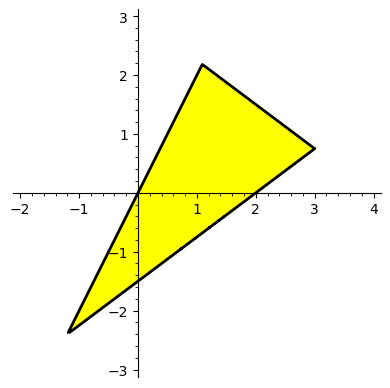

In [58]:
region_plot([3*x1-4*x2<=6,3*x1+4*x2<=12,2*x1-x2>=0],(x1,-2,4),(x2,-3,3),
            incol='yellow',borderwidth=2,bordercol='black',plot_points=300,figsize=(6,4))

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>11. zadatak</h3>
<p>Riješite sustav linearnih nejednadžbi</p>
$$\begin{align*}4x_1+5x_2&\leq10\\ x_1-2x_2&\leq1\\ 3x_1-4x_2&\geq-6\\ x_1&\geq0\\ x_2&\geq0\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>Uočite svih pet izračunatih vršnih rješenja</p>

In [59]:
solve([4*x1+5*x2<=10,x1-2*x2<=1,3*x1-4*x2>=-6,x1>=0,x2>=0],x1,x2)

[[max(0, 4/3*x2 - 2) < x1, x1 < min(2*x2 + 1, -5/4*x2 + 5/2), 0 < x2, x2 < (54/31)], [x1 == 0, 0 < x2, x2 < (3/2)], [x1 == 0, x2 == 0], [x1 == 0, x2 == (3/2)], [x1 == (10/31), x2 == (54/31)], [x1 == 1, x2 == 0], [x1 == (25/13), x2 == (6/13)], [x1 == -5/4*x2 + 5/2, (6/13) < x2, x2 < (54/31)], [x1 == 2*x2 + 1, 0 < x2, x2 < (6/13)], [x1 == 4/3*x2 - 2, (3/2) < x2, x2 < (54/31)], [x2 == 0, 0 < x1, x1 < 1]]

<p>grafička metoda</p>

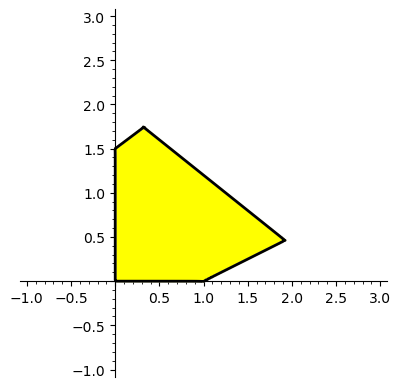

In [60]:
region_plot([4*x1+5*x2<=10,x1-2*x2<=1,3*x1-4*x2>=-6,x1>=0,x2>=0],(x1,-1,3),(x2,-1,3),
            incol='yellow',borderwidth=2,bordercol='black',plot_points=250,aspect_ratio=1,figsize=(6,4))

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>12. zadatak</h3>
<p>Riješite sustav linearnih nejednadžbi</p>
$$\begin{align*}-12x_1+3x_2&\leq3\\ 4x_1-10x_2&\leq5\\ x_1&\geq0\end{align*}.$$
</div>
<h3>Rješenje</h3>
<p>uočite oba izračunata vršna rješenja</p>

In [61]:
solve([-12*x1+3*x2<=3,4*x1-10*x2<=5,x1>=0],x1,x2)

[[max(0, 1/4*x2 - 1/4) < x1, x1 < 5/2*x2 + 5/4, (-1/2) < x2], [x1 == 0, (-1/2) < x2, x2 < 1], [x1 == 0, x2 == (-1/2)], [x1 == 0, x2 == 1], [x1 == 1/4*x2 - 1/4, 1 < x2], [x1 == 5/2*x2 + 5/4, (-1/2) < x2]]

<p>grafička metoda - uočite da je rješenje neomeđen skup u ravnini</p>

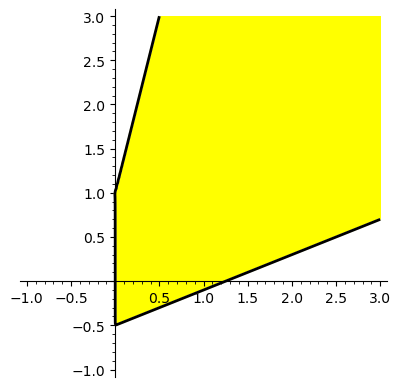

In [62]:
region_plot([-12*x1+3*x2<=3,4*x1-10*x2<=5,x1>=0],(x1,-1,3),(x2,-1,3),
            incol='yellow',borderwidth=2,bordercol='black',plot_points=250,aspect_ratio=1,figsize=(6,4))

<h1>Maxima</h1>

<p>Možda niste znali, ali unutar SAGE worksheeta možete direktno koristiti i <span style="color: #ff0000;"><em>maxima</em></span> kod. To možete napraviti globalno tako da u meniju na početku worksheeta umjesto <em><span style="color: #ff0000;">sage</span></em>, odaberete <span style="color: #ff0000;"><em>maxima</em></span>; ili pak možete lokalno samo unutar pojedine ćelije koristiti <em><span style="color: #ff0000;">maxima</span></em> kod tako da na početku te ćelije najprije napišete <em><span style="color: #ff0000;">%maxima</span></em>, a nakon toga unutar te ćelije počnete pisati <span style="color: #ff0000;"><em>maxima</em></span> kod.  Dolje ćemo pokazati lokalno korištenje maxime unutar pojedine ćelije na nekoliko prethodnih gore napravljenih zadataka. Nećemo ponovo prepisivati zadatke, nego ćemo samo napisati redni broj zadatka.</p>

<p><strong>1. zadatak</strong></p>

In [63]:
%%maxima
linsolve([2*x+3*y+z=2, x-3*y+2*z=6, -2*x+6*y-z=3], [x,y,z]);

[x=-7/3,y=5/9,z=5]


<p>matrica sustava, proširena matrica sustava i rangovi tih matrica</p>

In [64]:
%%maxima
M: coefmatrix([2*x+3*y+z=2, x-3*y+2*z=6, -2*x+6*y-z=3], [x,y,z]);
Mp: augcoefmatrix([2*x+3*y+z=2, x-3*y+2*z=6, -2*x+6*y-z=3], [x,y,z]);
[rank(M),rank(Mp)];

matrix([2,3,1],[1,-3,2],[-2,6,-1])
matrix([2,3,1,-2],[1,-3,2,-6],[-2,6,-1,-3])
[3,3]


<p><strong>2. zadatak</strong></p>

<p>opće rješenje gdje je varijabla $u$ parametar i pripadno bazično rješenje</p>

In [65]:
%%maxima
sustav: [x+y+2*z+3*u=6,x-4*y+2*z-3*u=-4,7*y+2*z+5*u=12,x+3*y+4*z+2*u=8]$
rj1:linsolve(sustav,[x,y,z,u]);
subst(0,%rnum_list[1],rj1);


[x=-(26*%r1-30)/5,y=-(6*%r1-10)/5,z=(17*%r1-10)/10,u=%r1]
[x=6,y=2,z=-1,u=0]


<p>opće rješenje gdje je varijabla $z$ parametar i pripadno bazično rješenje</p>

In [66]:
%%maxima
rj2: linsolve(sustav,[x,y,u,z]);
subst(0,%rnum_list[1],rj2);

[x=-(52*%r2-50)/17,y=-(12*%r2-22)/17,u=(10*%r2+10)/17,z=%r2]
[x=50/17,y=22/17,u=10/17,z=0]


<p>prethodna dva primjera u kojima ne uvodimo nova slova za parametre</p>

In [67]:
%%maxima
linsolve_params: false$
r1:linsolve(sustav,[x,y,z,u]);
subst(0,u,r1);


[x=-(26*u-30)/5,y=-(6*u-10)/5,z=(17*u-10)/10]
[x=6,y=2,z=-1]


In [68]:
%%maxima
r2:linsolve(sustav,[x,y,u,z]);
subst(0,z,r2);

[x=-(52*z-50)/17,y=-(12*z-22)/17,u=(10*z+10)/17]
[x=50/17,y=22/17,u=10/17]


<p>uvjet pod kojim je suma komponenata rješenja pozitivna ako uzmemo opće rješenje u kojemu je varijabla $y$ parametar</p>

In [69]:
%%maxima
load(fourier_elim)$
r3:linsolve(sustav,[x,z,u,y]);
nejednakost:sum(rhs(r3[i]),i,1,3)+y;
fourier_elim([nejednakost>0],[y]);


[x=(13*y-8)/3,z=-(17*y-22)/12,u=-(5*y-10)/6]
(-(17*y-22)/12)+(13*y-8)/3-(5*y-10)/6+y
[-10/37<y]


<p><strong>6. zadatak</strong></p>

In [70]:
%%maxima
A: matrix([0,1,-1,4],[2,1,0,1],[3,2,2,5],[-2,-4,-1,1])$
invert(A)


matrix([-13/82,53/82,-1/41,9/82],[15/82,-17/82,-2/41,-23/82],[-23/82,-45/82,14/41,-3/82],[11/82,-7/82,4/41,5/82])


In [71]:
%%maxima
doallmxops: false$
invert(A);


-matrix([13,-53,2,-9],[-15,17,4,23],[23,45,-28,3],[-11,7,-8,-5])/82
